# The Iterative Runaway Ice-Albedo Feedback Model
***
Hello! This module is a guide to constructing the Ice-Albedo Feedback Model. This model has been explained by Dr. David Archer in a video lecture and is also provided in Dr. Archer's Coursera course, "Global Warming II: Create Your Own Models in Python". This module assumes a schematic understanding of the Scientific processes and the Mathematics involved in the model. It also assumes a basic operational understanding of python, enough to import packages, define variables, arrays, indices, plotting and use loops. 

If at all you're unfamiliar with any of the above, you're encouraged to refer to the accompanying modules that focus on those topics.

You're encouraged to open a blank Jupyter notebook alongside this tutorial, so that you may try writing the program step-by-step yourself, as this module walks you through the process.

**Contents**

1. Breaking down the problem
1. Making an algorithm
1. Setting up the equations
1. Translating the mathematical framework into code
1. Plotting our results

## Breaking down the problem

If you've read about the Energy Balance Model, you would appreciate that to the first degree of approximation, the temperature of a planet is determined by the energy it receives from its star. For Earth, we call this the Solar Constant, measured as the incident solar power per unit area on Earth. For any particular value of the Solar Constant, treating the Earth as a perfect Black Body allows us to make a first order estimate of the Earth's surface temperature. For higher order corrections to this estimate, numerous complicated and inter-connected processes together determine the equilibrium temperature for Earth. \
In this module, we focus on how the Ice-Albedo feedback cycles affect the surface temperature and the process of attaining equilibrium.

Schematically, the following happens: \
A certain value of the Solar Constant determines the incident power on Earth. Out of this incident power, a fraction is reflected back into space due to Earth's albedo. Assuming Earth as a black body, the Stefan-Boltzmann Law determines the surface temperature of the Earth using the net incident power. This surface temperature will now determine how much ice cover the planet has- ice may form or melt with different surface temperatures. Since the ice cover is directly related to the albedo of the planet, surface temperatures can in turn determine the albedo of the planet. Using this new albedo and the same Solar Constant, a different **net** incident power reaches Earth. Therefore, we can determine a new surface temperature using the Stefan-Boltsmann Law, and then again calculate albedo from this new surface temperature. After several such cycles, the albedo and the surface temperature reach an equilibrium. Note that during these several ice-albedo feedback cycles, the Solar Constant does not change. We're effectively only finding how equilibrium temperature is attained for that value of the Solar Constant. Next, we would want to study this process of reaching equilibrium for different values of the Solar Constant.

During each cycle, we use the Stefan-Boltzmann Law to find temperature, and a linear relation to calculate the planetary albedo and the latitude of ice cover using the temperature. The latitude of ice cover refers to the latitude upto which the ice extends from the poles. The linear relations are of the form $\textit{y = mx + c}$. Therefore, we must first know what $\textit{m}$ and $\textit{c}$ are. You will be given some arbitrary data for albedo values versus temperature as well as latitude versus temperature. Using this data, we will perform curve fitting to determine the parameters $\textit{m}$ and $\textit{c}$ for both the relations.

## Making an algorithm

Now, let's list down the procedure we've devised:

1. Parametrization: Plot and curve fit the data for albedo v/s temperature and latitude v/s temperature to determine the linear relations. 
1. Calculate temperature as a function of the Solar Constant and albedo using Stefan-Boltzmann Law.
1. Calculate new albedo as a function of temperature.
1. Calculate latitude as a function of temperature.
1. Loop over the steps 2, 3 and 4 for several iterations. This forms the core of the Ice-albedo feedback cycle.
1. Define a desired range of Solar Constants and loop over steps 2, 3, 4 and 5 to observe the Ice-albedo feedback cycle for various Solar Constants.

## Setting up the equations

For the sake of unambiguity, let's set up the key equations:
1. Stefan-Boltzmann Law:
\begin{align}
\textrm{Surface Temperature} & = \left(\frac{\textrm{L}(1-\textrm{albedo})}{4\sigma}\right)^{1/4} \\
\end{align}
where L is the solar constant and $\sigma$ is the Stefan Boltzmann constant, equal to 5.67e$^{-8}$. The units of Incident Solar Power are Watts/m$^2$ 

2. Albedo as a linear function of Temperature:
\begin{align}
\textrm{Albedo} & = \textrm{M$_{albedo}$}*\textrm{Temperature} + \textrm{C$_{albedo}$} 
\end{align}
where M$_{albedo}$ and C$_{albedo}$ are constant parameters.

3. Latitude as a linear function of Temperature:
\begin{align}
\textrm{Latitude} & = \textrm{M$_{lat}$}*\textrm{Temperature} + \textrm{C$_{lat}$} 
\end{align}
    where M$_{lat}$ and C$_{lat}$ are constant parameters.

## Let's Code!

All the conceptual framework we need is complete. We can now dive into the programming part.
Start by importing all the python packages that we will need.

In [1]:
#Some useful packages
import numpy as np                            #Several mathematical uses
import matplotlib.pyplot as plt               #For plotting
import matplotlib.cm as cm                    #For color maps on plots
import scipy as scp                           #For curve fitting
from scipy.optimize import curve_fit

### Parametrization

I've given some data in the form of arrays below. Plot a Temperature versus Albedo and a Temperature versus Latitude graph. You should get straight line graphs. Next, fit an appropriate straight line to these graphs using the scipy.curve_fit package. You will, thus, get the slope and intercept values.

slope is (AlbedoM) -0.01
intercept is (AlbedoC) 2.8


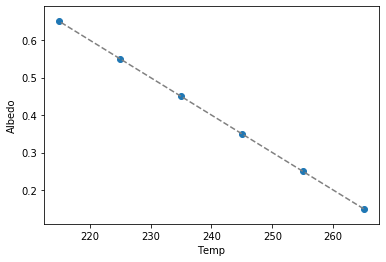

slope is (LatM) 1.5
intercept is (LatC) -322.5


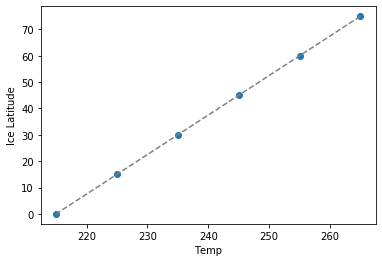

In [2]:
# Data for Parametrization

#Temperature data
Temp = np.array([265, 255, 245, 235, 225, 215])  
#Latitude data
Lat = np.array([75, 60, 45, 30, 15, 0])
#Albedo data
Albedo = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65])

#====================================================

# Plot for Temp v/s Albedo

plt.scatter(Temp, Albedo)
plt.xlabel("Temp", fontsize='10')
plt.ylabel("Albedo", fontsize='10')

# Curve Fitting

def f(x, a, b):        # Defining this function ensures that
                       # we are returned a fit of the
                       # desired form (f(x) = a*x + b).
    return a*x + b

par, covariance = scp.optimize.curve_fit(f, Temp, Albedo)

                       # The second and third arguments in the above
                       # function should be the x and y data points
                       # of the graph.

print("slope is (AlbedoM)", np.round(par[0],3))
print("intercept is (AlbedoC)", np.round(par[1],3))

m=np.round(par[0],6)   # We extract the slope and intercept values
                       # from the 'par' array that is generated as 
                       # a result of the curve_fit func.
c=np.round(par[1],3)

ytrend=m*Temp + c      # Define the trendline using calculated slope 
                       # and intercept
    
plt.plot(Temp,ytrend, '--', color= "grey") #Plot trendline

plt.show()

#====================================================

# Plot for Temp v/s Ice Lat

plt.scatter(Temp, Lat)
plt.xlabel("Temp", fontsize='10')
plt.ylabel("Ice Latitude", fontsize='10')

# Curve Fitting

def f(x, a, b):        # Defining this function ensures that
                       # we are returned a fit of the
                       # desired form (f(x) = ax+b).
    return a*x + b

par, covariance = scp.optimize.curve_fit(f, Temp, Lat)

                       # The second and third arguments in the above
                       # function should be the x and y data points
                       # of the graph.

print("slope is (LatM)", np.round(par[0],3))
print("intercept is (LatC)", np.round(par[1],3))

m=np.round(par[0],6)   # We extract the slope and intercept values
                       # from the 'par' array that is generated as 
                       # a result of the curve_fit func.
c=np.round(par[1],3)

ytrend=m*Temp + c      # Define the trendline using calculated slope 
                       # and intercept
    
plt.plot(Temp,ytrend, '--', color= "grey") #Plot trendline

plt.show()

Since we used a particular dataset to parametrize the relations for albedo, temperature and latitude, we should keep in mind that these parametrizations are only useful within the range of the data that we used. Since our data for albedo ranged from 0.15 to 0.65, any calculations using the parameters to extraplate a value of the albedo should be within this range to avoid error during extrapolation. We will have to specify this condition in our code for the iterative process to make sure that the simulation doesn't run into meaningless values of albedo and latitude.

### Iterative Process

Set up the parameters. These include AlbedoM, AlbedoC, LatM, LatC, number of iteration and the stefan-boltzmann constant. Set up the empty lists where you would save the computed values. In this problem, we desire to plot two types of graphs. One would be Temperature v/s Iterations for varying Solar Constant to understand the equilibration process and identify the runaway feedback effect. The second would be Equilibrium Temperature v/s Solar Constant. Understandably, you need four empty lists. You can always plot different graphs and make appropriate changes. Next, set up the range of Solar Constants. Choose an initial Solar Constant and initial albedo. Once these basics have been set up, we can write the core loops as dicussed in the 'Algorithms' part above. Run the loop over different Solar Constants from the largest value to the smallest value, and then the opposite way.
In this module, we will do the case of gradually decreasing Solar Constant and gradually increasing Solar Constant. This may intuitively seem redundant, but wait for some time, you'll shortly see something very interesting!

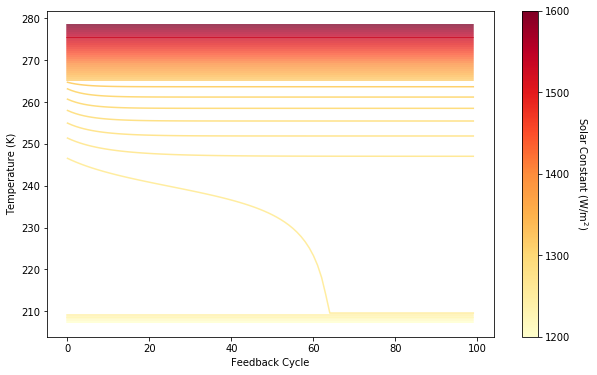

In [14]:
# The Case for Decreasing solar constant

#====================================================

#Parameters

albedoM = -0.01
albedoC = 2.8
latM = 1.5
latC = -322.5

nIters = 100               #Number of Iterations
sigma = 5.67*10**(-8)      #Stefan-Boltzmann Constant

#====================================================
#Empty arrays and lists

Iterations = np.zeros(nIters)        
Temperature = np.zeros(nIters)    #Temperature during each iteration
Solar_Constant = []               
Equi_Temp = []                    #Equilibrium Temperature

#====================================================

#Set up the color map for visualizing the plot (not very important/optional)

YlOrRd = cm.get_cmap('YlOrRd', 401)     #This is calibrating your colormap 
                                        #as per your data size. The second 
                                        #argument divides the colormap into as 
                                        #many sections and assigns the integral
                                        #value to that section.



LRange = [ 1200, 1600 ]                 #Range of Solar Constants
L = LRange[1]                           # Set initial Solar Constant (largest)
albedo = 0.15                           # Set initial albedo

#====================================================

#Main body

while L > LRange[0]-1:                         # Loop over Solar Constants
    
    for i in range (0, nIters):                # Loop over iterations
        
        T = (L*(1-albedo)/(4*sigma))**(1/4)    #Calculating Temperature
        
        albedo = albedoM * T + albedoC         #Calculating Albedo
        
        albedo = min(albedo, 0.65)  # These two steps ensure that albedo is
        albedo = max(albedo, 0.15)  # within the range of the original data.
        
        
        
        lat = latM * T + latC       # Calculating Latitude
        lat = min(lat, 90)          # Restricting range of latitudes
        lat = max(lat, 0)
        
        
        Iterations[i] = i           # Add data to the respective arrays
        Temperature[i] = T
        
    #For each Solar Constant, we plot the equilibration curves
    plt.plot(Iterations,Temperature, color = YlOrRd(L-1200))
    
    Solar_Constant.append(L)        # Add data to the respective arrays
    Equi_Temp.append(T)
    
    L = L - 10                      # Decrease the Solar Constant for the 
                                    # next equilibration process 
        

#====================================================

#Configuring the colormap and color bar. You may ignore this and 
#simply copy-paste it if you're unfamiliar with this method.


m = cm.ScalarMappable(cmap=cm.YlOrRd)

cbar = plt.colorbar(m)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(["1200", "1300", "1400", "1500", "1600"])
cbar.set_label('Solar Constant (W/m$^2$)',labelpad = 20, rotation=270, fontsize='10')
#====================================================

#Figure

plt.rcParams['figure.figsize']=[10,6]
plt.xlabel("Feedback Cycle", fontsize='10')
plt.ylabel("Temperature (K)", fontsize='10')


plt.show()

As you can observe in the above figure, for extreme values of the Solar Constant, Temperature almost immediately equilibrates, and thus produces horizontal lines. However, around Solar Constant = 1250, we see some sort of a cut off which causes Temperature to rapidly destabilize and eventually reach equilibrium at a much colder level. This is what is called the 'runaway ice-albedo' effect. \
Next, repeat the program for increasing Solar Constant. Do not redefine the lists for Equilibrium Temperatures and Solar Constants as we want a combined data set for these two quantities for both increasing and decreasing Solar Constants.

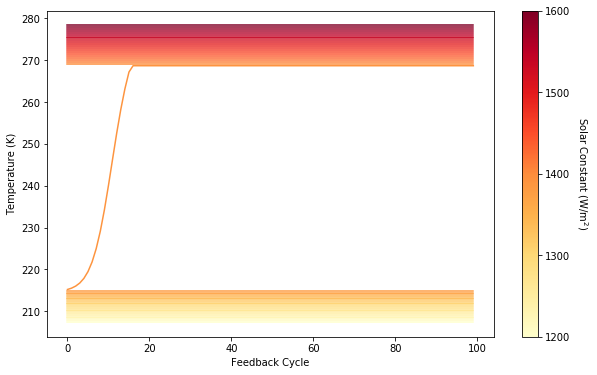

In [4]:
# The Case for Increasing solar constant

#====================================================
#Empty arrays and lists

Iterations = np.zeros(nIters)        
Temperature = np.zeros(nIters)    #Temperature during each iteration

#====================================================

#Set up the color map for visualizing the plot (not very important/optional)

YlOrRd = cm.get_cmap('YlOrRd', 401)      
    
LRange = [ 1200, 1600 ]                 #Range of Solar Constants
L = LRange[0]                           # Set initial Solar Constant 
                                        # This time we want to start 
                                        # at the lowest value

#====================================================

#Main body

while L < LRange[1]+1:                  # Loop over Solar Constants
    
    for i in range (0, nIters):         # Loop over iterations
        
        T = (L*(1-albedo)/(4*sigma))**(1/4)    #Calculating Temperature
        
        albedo = albedoM * T + albedoC         #Calculating Albedo
        
        albedo = min(albedo, 0.65)  
        albedo = max(albedo, 0.15)  
        
        
        
        lat = latM * T + latC                  # Calculating Latitude
        lat = min(lat, 90)                     
        lat = max(lat, 0)
        
        
        Iterations[i] = i                      # Save desired data
        Temperature[i] = T
        
    #For each Solar Constant, we plot the equilibration curves
    plt.plot(Iterations,Temperature, color = YlOrRd(L-1200))
    
    Solar_Constant.append(L)                   # Saving data
    Equi_Temp.append(T)
    
    L = L + 10                   # Increase the Solar Constant for the 
                                 # next equilibration process.
        

#====================================================

#Configuring the colormap and color bar. You may ignore this and 
#simply copy-paste it if you're unfamiliar with this method.


m = cm.ScalarMappable(cmap=cm.YlOrRd)

cbar = plt.colorbar(m)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(["1200", "1300", "1400", "1500", "1600"])
cbar.set_label('Solar Constant (W/m$^2$)',labelpad = 20, rotation=270, fontsize='10')
#====================================================

#Figure

plt.rcParams['figure.figsize']=[10,6]
plt.xlabel("Feedback Cycle", fontsize='10')
plt.ylabel("Temperature (K)", fontsize='10')


plt.show()

Compare this graph with the previous graph. Something quite unexpected seems to have happened. This time, the runaway feedback cycle occured at a much higher Solar Constant than the previous case. Also, this time the change is a lot steeper, that is, faster. This difference in the response of Temperature to increasing and decreasing Solar Constant is better visualized through a graph of Equilibrium Temperature v/s Solar Constant. 

## The final Plot

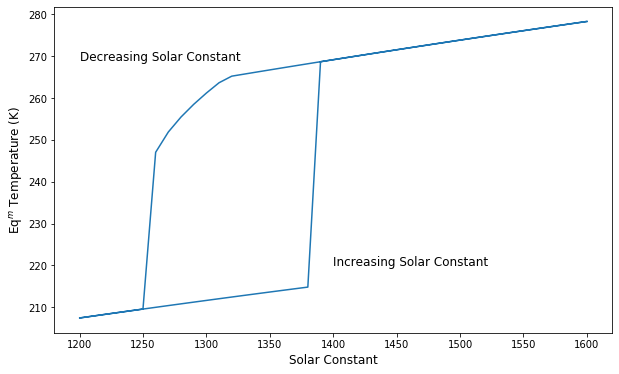

In [13]:
plt.plot(Solar_Constant,Equi_Temp)

plt.text(1200, 269, "Decreasing Solar Constant", fontsize = '12')
plt.text(1400, 220, "Increasing Solar Constant", fontsize = '12')

plt.rcParams['figure.figsize']=[10,6]
plt.xlabel("Solar Constant", fontsize='12')
plt.ylabel("Eq$^m$ Temperature (K)", fontsize='12')
plt.show()

We can now clearly observe how during the case of decreasing Solar Constant, Temperature gradually decreases, but beyond a certain point, around 1250 Watt/m$^2$, it decreases very rapidly. This marks a glacial period. On the other hand, during the case of increasing Solar Constant, initially temperatures changes very slowly, maintaining the glacial period, but beyond a higher cut off, nearly 1400 Watt/m$^2$, the planet heats up very rapidly. This marks the beginning of an inter-glacial period. In fact, it's very clear that the planet heats up much faster than it cools down.\
This phenomenon has some very interesting manifestations. You're encouraged to read about the Milankovoch cycles, how they influence the Solar Constant, and in turn, the Glaciation cycles on Earth. In this specific context, in addition to the ice-albedo feedback effect, glacial-interglacial periods are strongly affected by Carbon-Dioxide concentrations. Therefore, while we've seen very strong influences of the ice-albedo feedback effect on the planetary temperature, it's important to not lose sense of the larger picture, wherein innumerable other phenomenon work in parallel to this, and equally impact global climate. 